# Data Exploration

**Author**: Wrijupan Bhattacharyya

**Description**: This notebook is prepared for a Used Cars analytics project. The data consist of two csv files-
  1. Case_Study_Data.csv - Contains data on car listings of a used car business
  2. Data_Description.csv - Contains descriptions of the columns in the above CSV file

  **Task**: There are three main tasks this notebook is accomplishing-

    1. Data exploration
    2. Treatment of the missing values
    3. Treatment of the outliers

The cleaned data is then exported as a CSV file for further use in the subsequent regression and classification tasks

**Contents**: The notebook contains the following sections-


  1. Setting up the environment
  2. Importing the data
  3. Treatment of the missing values
  5. Univariate data exploration
  6. Treatment of the outliers
  7. Bivariate data exploration
  8. Exporting the cleaned data


# 1. Setting up the environment



In [1]:
##########################################################
# Import Python libraries
##########################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Mount google drive

In [2]:
from google.colab import drive
drive.mount('/gdrive')
# Navigate to the Google drive folder where the data is stored

Mounted at /gdrive


# 2 Importing the data

In [ ]:
data = pd.read_csv("./data/Case_Study_Data.csv", sep=";")

In [ ]:
data.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


In [ ]:
data.describe()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days
count,7.832100e+04,78321.000000,78321.000000,78321.000000,78311.000000,78311.000000,78321.000000
mean,3.574869e+08,15067.655316,4.632117,2011.089465,2297.502522,93.469870,35.986262
std,5.076572e+06,16374.497606,2.354275,6.538395,6339.034423,228.025588,32.214835
min,3.472324e+08,1.000000,1.000000,1924.000000,0.000000,0.000000,-3.000000
25%,3.536387e+08,5750.000000,3.000000,2008.000000,367.000000,13.000000,10.000000
50%,3.585480e+08,10900.000000,5.000000,2013.000000,920.000000,36.000000,25.000000
75%,3.614817e+08,18890.000000,7.000000,2015.000000,2234.000000,94.000000,55.000000
max,3.647040e+08,249888.000000,9.000000,2106.000000,608754.000000,13926.000000,127.000000


# 3. Treatment of the missing values

In [ ]:
def find_missing_values(df):
    """
    Report which columns have missing values
    and what percentage of data is missing
    in each column.

    Optional: Produce a plot to visualize which rows
    cpntain missing values.
    """
    # Plot rows containing missing values
    """plt.figure(figsize=(6, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='inferno')
    plt.ylabel("Row id")
    plt.show()
    plt.close()"""

    # Create a dataframe to report missing values

    no_of_missing_values = df.isnull().sum()
    pct_of_missing_values = df.isnull().sum() * 100 / len(df)

    missing_df = pd.DataFrame({
        'Number of missing vals': no_of_missing_values,
        'Pct of missing vals': pct_of_missing_values

    }).reset_index()

    missing_df = missing_df.rename(columns={'index': 'Features'})

    return missing_df

In [ ]:
# Find which columns have missing values
find_missing_values(data)

,Features,Number of missing vals,Pct of missing vals
0,article_id,0,0.000000
1,product_tier,0,0.000000
2,make_name,0,0.000000
3,price,0,0.000000
4,first_zip_digit,0,0.000000
5,first_registration_year,0,0.000000
6,created_date,0,0.000000
7,deleted_date,0,0.000000
8,search_views,10,0.012768
9,detail_views,10,0.012768


In [ ]:
# There are only a few missing values in the "search_views", "detail_views", "ctr" columns
# Hence we drop them.
data_non_missing = data.dropna()
data_non_missing.isnull().sum()

article_id                 0
product_tier               0
make_name                  0
price                      0
first_zip_digit            0
first_registration_year    0
created_date               0
deleted_date               0
search_views               0
detail_views               0
stock_days                 0
ctr                        0
dtype: int64

# 4. Data exploration

### 4.1 Ctr
This is a non-numeric column with some weird string entries. This column will be removed and built again from its definition-

*ctr = Click through rate calculated as the quotient of detail_views over search_views*

In [ ]:
data_ctr = data_non_missing.drop(columns=['ctr'])

In [ ]:
data_ctr.loc[:, 'ctr'] = data_ctr.loc[:, 'detail_views'] / data_ctr.loc[:, 'search_views']
data_ctr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78297 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78297 non-null  int64  
 1   product_tier             78297 non-null  object 
 2   make_name                78297 non-null  object 
 3   price                    78297 non-null  int64  
 4   first_zip_digit          78297 non-null  int64  
 5   first_registration_year  78297 non-null  int64  
 6   created_date             78297 non-null  object 
 7   deleted_date             78297 non-null  object 
 8   search_views             78297 non-null  float64
 9   detail_views             78297 non-null  float64
 10  stock_days               78297 non-null  int64  
 11  ctr                      78297 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 7.8+ MB


### 4.2 Univariate analysis

In [ ]:
def plot_distribution(df, col='ctr', color='red'):
    """
    Plots the distribution of a given variable
    in the dataframe df.

    :param df: Dataframe
    :param col: Column whose distribution is plotted
    :param color: Histogram color
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    sns.set(style="darkgrid", font_scale=1.2)

    sns.distplot(df[col],
                 ax=ax,
                 bins=50,
                 label=col,
                 color=color)

    ax.legend()
    ax.set_title("Distribution of {}".format(col))
    ax.set_ylabel("Normalized frequency")
    #plt.savefig("./images/{}.png".format(col))
    plt.show()
    plt.close()

##### **Ctr**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


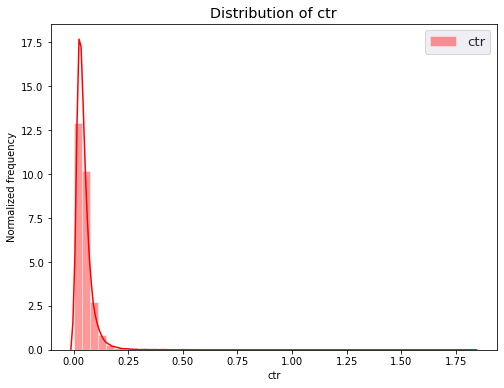

In [ ]:
plot_distribution(data_ctr, col='ctr')

##### **Detail views**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


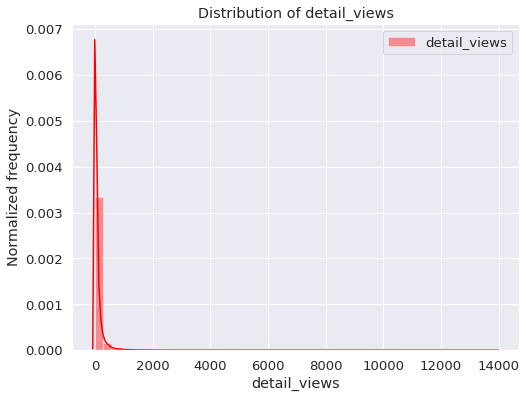

In [ ]:
plot_distribution(data_ctr, col='detail_views')

##### **Search views**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


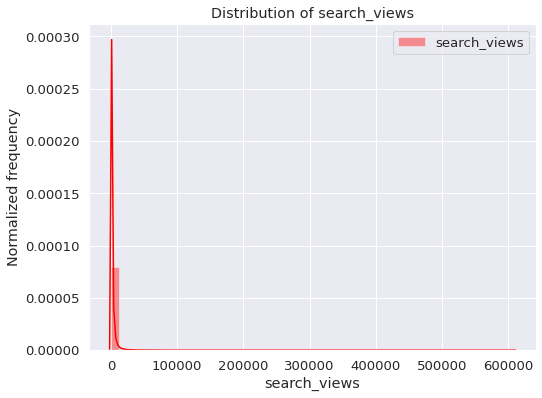

In [ ]:
plot_distribution(data_ctr, col='search_views')

##### **first_registration_year**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


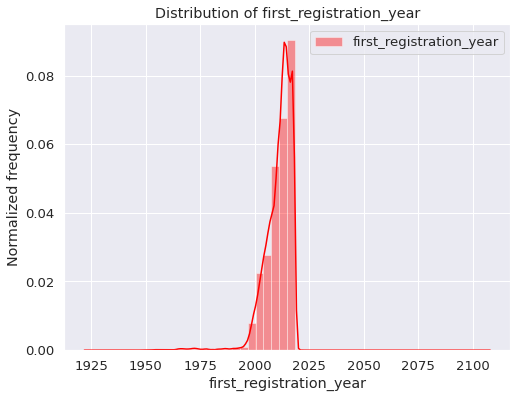

In [ ]:
plot_distribution(data_ctr, col='first_registration_year')

##### **Price**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


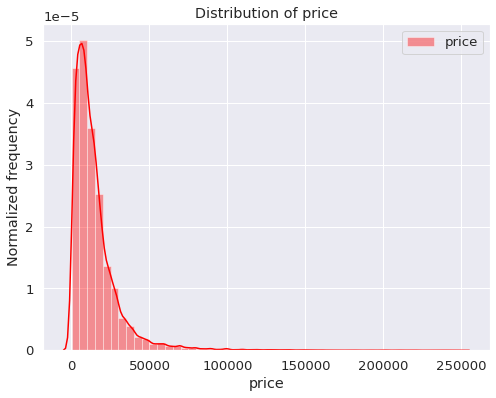

In [ ]:
plot_distribution(data_ctr, col='price')

##### **stock_days**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


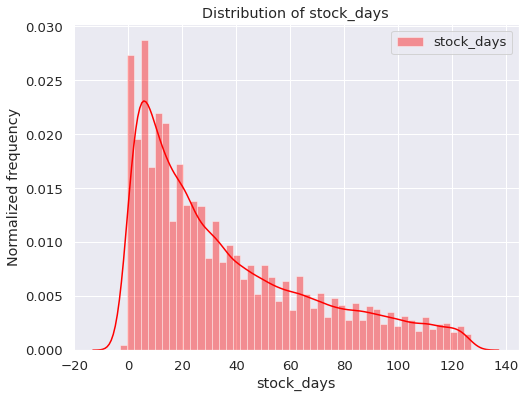

In [ ]:
plot_distribution(data_ctr, col='stock_days')

# 5. Treatment of the outliers

Amongst the columns present in the data, some of the columns are highly affected by outliers,namely -

  1. ctr
  2. search_views
  3. detail_views
  4. first_registration_year (here there are some very old car listings as well as wrong years as can be seen from the higher tail)
  5. stock_days

Some of the outliers will be removed from the columns as they affect the performance of the model. The strategy for removal is the following -

  Values < the 99th percentile are accepted. For the first_registration_year year additionally, the years that are greater than 2 percentile are accepted.


In [ ]:
def drop_outlier(df, col='search_views', per=99, high=True):
    """
    Drop outliers from the given column
    according to a percentile measure

    df: Dataframe
    col: Which column's outliers need to be removed
    per: The percentile value for outliers
    high: Whether outliers are present in the higher tail
    """
    pct = np.percentile(df.loc[:, col], per)
    if high:
        df = df.loc[df[col] < pct]
    else:
        df = df.loc[df[col] > pct]
    return df

##### **search_views**

In [ ]:
data2 = drop_outlier(data_ctr, col='search_views', per=99, high=True)

##### **detail_views**

In [ ]:
data3 = drop_outlier(data2, col='detail_views', per=99, high=True)

##### **ctr**

In [ ]:
data4 = drop_outlier(data3, col='ctr', per=98, high=True)

##### **first_registration_year**

In [ ]:
# Remove the unrealistic year from the higher end
# First registration year
high_reg_year_mask = data4.first_registration_year < 2019
data5 = data4[high_reg_year_mask]

In [ ]:
# Remove higher outliers
data6 = drop_outlier(data5, col='first_registration_year', per=2, high=False)

##### **Price**

In [ ]:
data7 = drop_outlier(data6, col='price', per=98)

# 6. Further data exploration



##### **detail_views**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


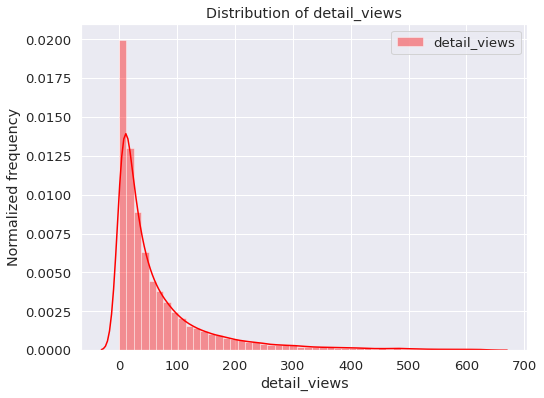

In [ ]:
plot_distribution(data7, col='detail_views')

##### **product_tier**

In [ ]:
def plot_counts(df, col='manufacturer'):
    """
    Generate countplot for a given Dataframe and
    categorical column

    :param df: Dataframe
    :param col: Categorical column
    """
    fig, ax = plt.subplots(figsize=(12, 9))

    sns.set(style="darkgrid", font_scale=1.2)

    sns.countplot(x=col,
                  data=df,
                  order=df[col].value_counts().index,
                  ax=ax)

    ax.set_title("Countplot of different "
                 "entries in the column {}".format(col))
    plt.xticks(rotation=90)
    # plt.savefig("./images/{}.png".format(col))
    plt.show()
    plt.close()

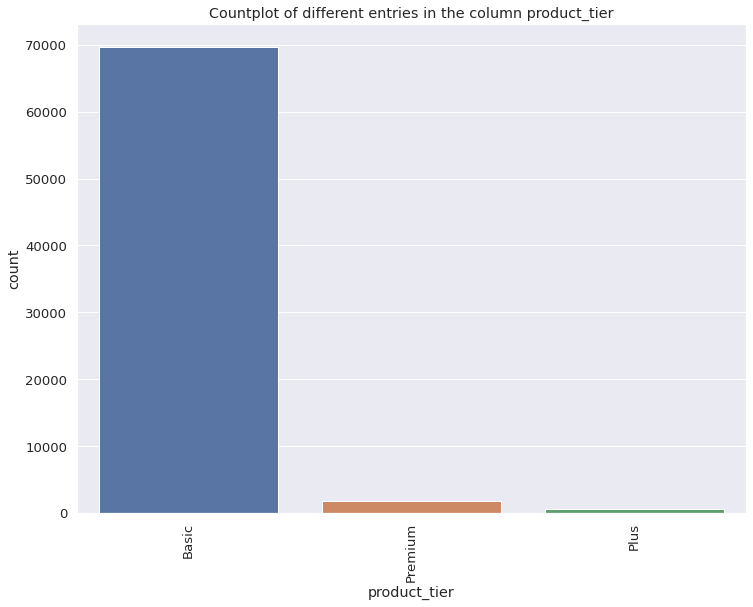

In [ ]:
plot_counts(data7, col='product_tier')

As can be seen this is a highly imbalanced dataset

In [ ]:
data7['product_tier'].value_counts()

Basic      69689
Premium     1731
Plus         513
Name: product_tier, dtype: int64

##### **ctr**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


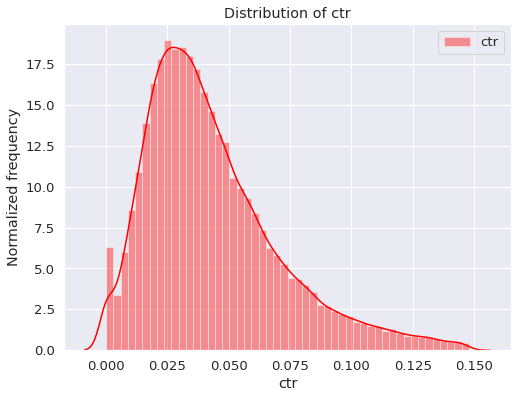

In [ ]:
plot_distribution(data7, col='ctr')

##### **Feature engineering from the datetime columns**

In [ ]:
# Convert the created_date and deleted_date cols into datetime objects
data7['created_date'] = pd.to_datetime(data7['created_date'])
data7['deleted_date'] = pd.to_datetime(data7['deleted_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Engineer datetime features
data7['created_month'] = data7['created_date'].apply(lambda x: x.month)
data7['created_dayofweek'] = data7['created_date'].apply(lambda x: x.dayofweek)
data7['created_day'] = data7['created_date'].apply(lambda x: x.day)


data7['deleted_year'] = data7['deleted_date'].apply(lambda x: x.year)
data7['deleted_month'] = data7['deleted_date'].apply(lambda x: x.month)
data7['deleted_dayofweek'] = data7['deleted_date'].apply(lambda x: x.dayofweek)
data7['deleted_day'] = data7['deleted_date'].apply(lambda x: x.day)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
data7.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,created_month,created_dayofweek,created_day,deleted_year,deleted_month,deleted_dayofweek,deleted_day
0,350625839,Basic,Mitsubishi,16750,5,2013,2018-07-24,2018-08-24,3091.0,123.0,30,0.039793,7,1,24,2018,8,4,24
1,354412280,Basic,Mercedes-Benz,35950,4,2015,2018-08-16,2018-07-10,3283.0,223.0,52,0.067926,8,3,16,2018,7,1,10
3,350266763,Basic,Ford,1750,6,2003,2018-07-20,2018-10-29,1856.0,26.0,101,0.014009,7,4,20,2018,10,0,29
4,355688985,Basic,Mercedes-Benz,26500,3,2014,2018-08-28,2018-08-09,490.0,20.0,12,0.040816,8,1,28,2018,8,3,9
5,361204569,Basic,Volkswagen,24890,6,2017,2018-10-20,2018-10-22,125.0,6.0,2,0.048000,10,5,20,2018,10,0,22


### 6.1 Bivariate analysis

##### **product_tier vs detail_views** 

In [ ]:
def plot_boxplot(df, x_col='product_tier', y_col='detail_views', plot_hue=False, hue_col=None):
    """
    Boxplot of Dataframe with cols x_col and y_col

    :param df: Dataframe
    :param x_col: x-value for boxplot
    :param y_col: y-value for boxplot
    :param plot_hue: Whether there is an additional hue parameter
    :param hue_col: Column to use as the hue for boxplot
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    if not plot_hue:
        sns.set(style="darkgrid", font_scale=1.2)

        sns.boxplot(x=x_col,
                    y=y_col,
                    data=df,
                    ax=ax)

        ax.set_title("Boxplot of {} grouped "
                     "by {}".format(y_col, x_col))
        plt.xticks(rotation=90)
        #plt.savefig("./images/boxplot_{}_{}.png".format(y_col, x_col))
        plt.show()
        plt.close()
    else:
        sns.set(style="darkgrid", font_scale=1.2)

        sns.boxplot(x=x_col,
                    y=y_col,
                    data=df,
                    hue=hue_col,
                    ax=ax)

        ax.set_title("Boxplot of {} grouped "
                     "by {}".format(y_col, x_col))
        plt.xticks(rotation=90)
        #plt.savefig("./images/boxplot_{}_{}.png".format(y_col, x_col))
        plt.show()
        plt.close()

In [ ]:
def plot_barplot(df, x_col='product_tier', y_col='detail_views', plot_hue=False, hue_col=None):
    """
    Barplot of Dataframe with cols x_col and y_col

    :param df: Dataframe
    :param x_col: x-value for boxplot
    :param y_col: y-value for boxplot
    :param plot_hue: Whether there is an additional hue parameter
    :param hue_col: Column to use as the hue for boxplot
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    if not plot_hue:
        sns.set(style="darkgrid", font_scale=1.2)

        sns.barplot(x=x_col,
                    y=y_col,
                    data=df,
                    ax=ax)

        ax.set_title("Barplot of {} grouped "
                     "by {}".format(y_col, x_col))
        plt.xticks(rotation=90)
        #plt.savefig("./images/boxplot_{}_{}.png".format(y_col, x_col))
        plt.show()
        plt.close()
    else:
        sns.set(style="darkgrid", font_scale=1.2)

        sns.barplot(x=x_col,
                    y=y_col,
                    data=df,
                    hue=hue_col,
                    ax=ax)

        ax.set_title("Barplot of {} grouped "
                     "by {}".format(y_col, x_col))
        plt.xticks(rotation=90)
        #plt.savefig("./images/boxplot_{}_{}.png".format(y_col, x_col))
        plt.show()
        plt.close()

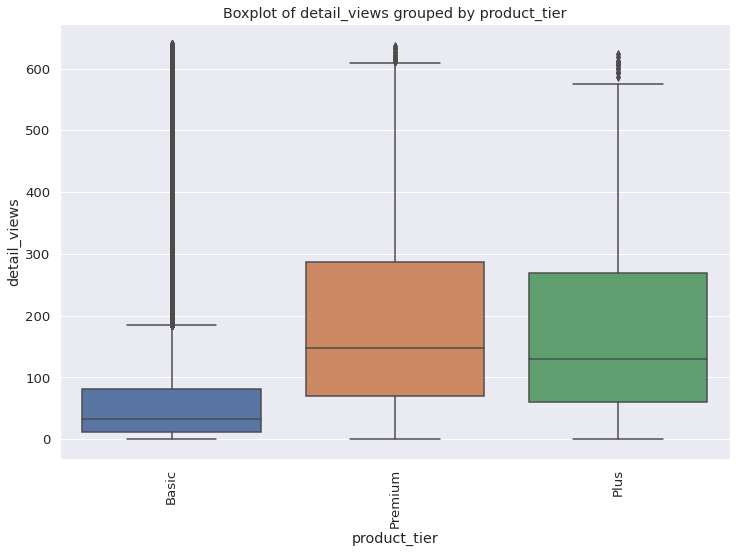

In [ ]:
plot_boxplot(data7, x_col='product_tier', y_col='detail_views')

##### **product_tier vs price**

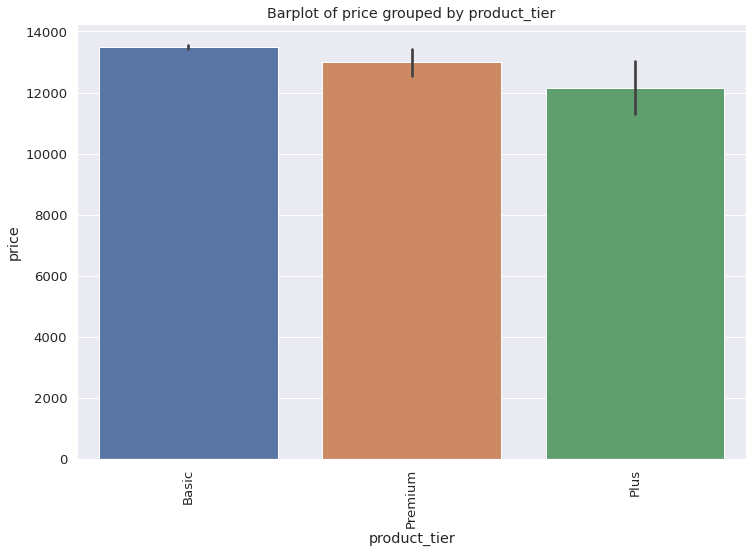

In [ ]:
plot_barplot(data7, x_col='product_tier', y_col='price')

##### **ctr vs detail_views**

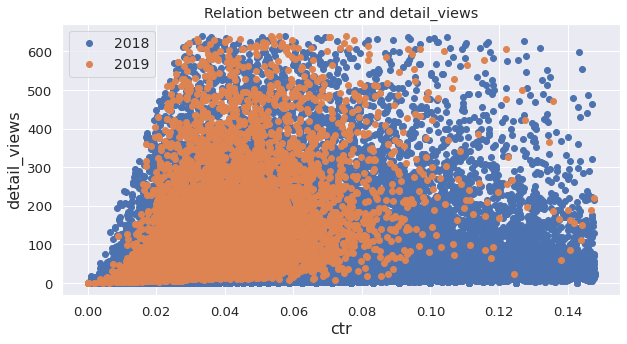

In [ ]:
plot_scatter(data7, x_col='ctr', y_col='detail_views')

##### **make_name vs detail_views**

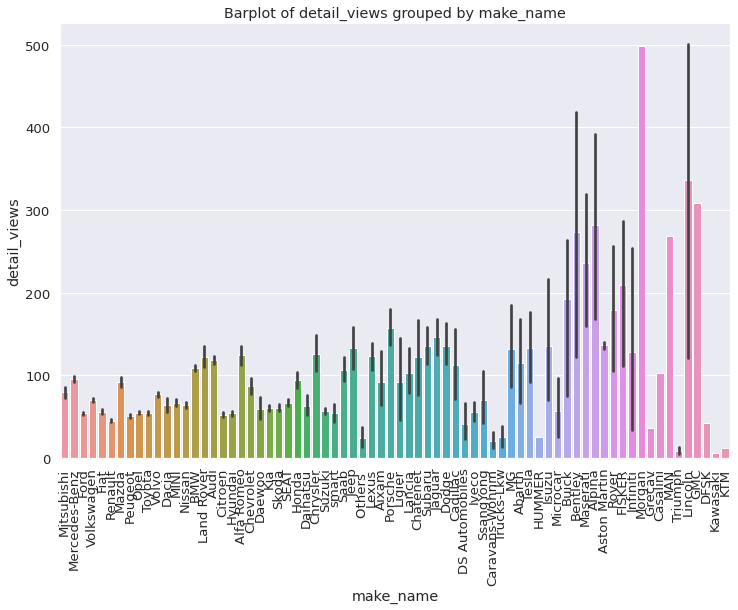

In [ ]:
plot_barplot(data7, x_col='make_name', y_col='detail_views')

##### **search_views vs detail_views**

In [ ]:
def plot_scatter(df, x_col='search_views', y_col='detail_views'):
    """
    Plot a scatterplot of df columns to show the relation
    y_col vs x_col visually.

    :param df: Dataframe
    :param x_col: x-value of scatterplot
    :param y_col: y-value of scatterplot
    """
    fig, ax = plt.subplots(figsize=(10, 5))

    mask_2019 = df.deleted_year == 2019

    ax.scatter(df[x_col][~mask_2019],
               df[y_col]
               [~mask_2019],
               label='2018',
               cmap='viridis')

    ax.scatter(df[x_col][mask_2019],
               df[y_col]
               [mask_2019],
               label='2019',
               cmap='viridis')

    ax.set_title("Relation between {} and {}".format(x_col, y_col))
    ax.set_xlabel(x_col, fontsize=16)
    ax.set_ylabel(y_col, fontsize=16)

    plt.legend(fontsize=14)
    #plt.savefig("./images/{}_vs_{}.png".format(y_col, x_col))
    plt.show()
    plt.close()

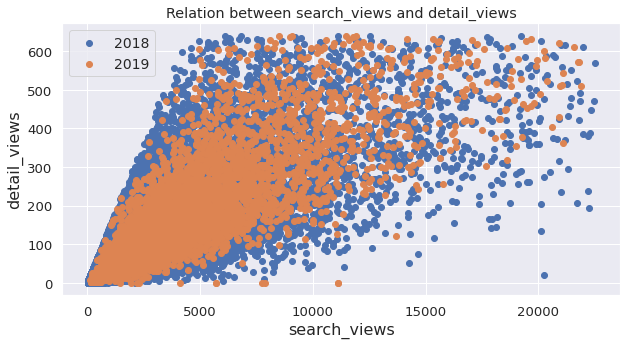

In [ ]:
plot_scatter(data7, x_col='search_views', y_col='detail_views')

##### **stock_days vs detail_views**

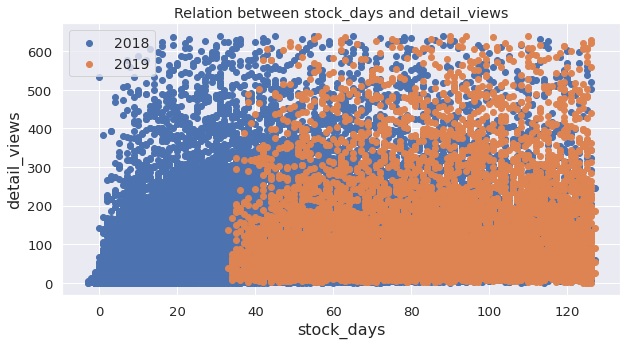

In [ ]:
plot_scatter(data7, x_col='stock_days', y_col='detail_views')

##### **deleted_year vs detail_views**

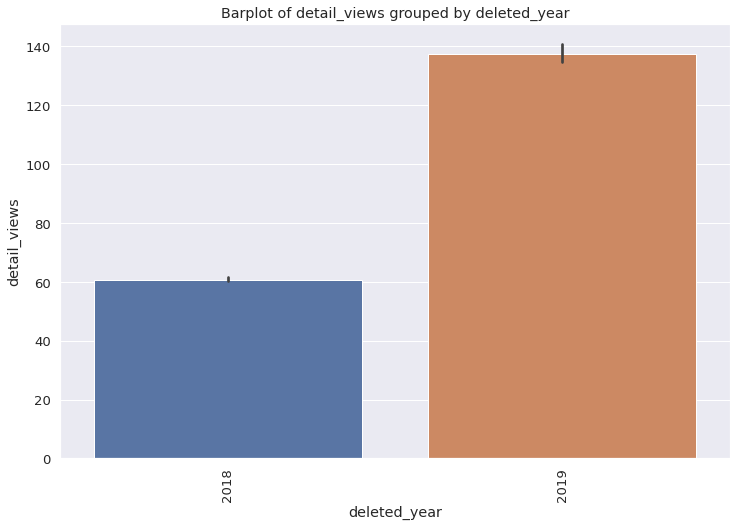

In [ ]:
plot_barplot(data7, x_col='deleted_year', y_col='detail_views')

##### **product_tier vs search_views**

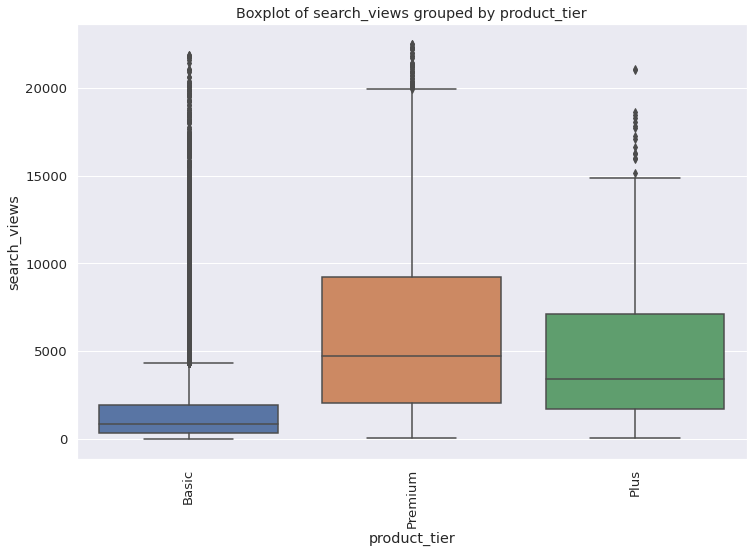

In [ ]:
plot_boxplot(data7, x_col='product_tier', y_col='search_views')

##### **product_tier vs ctr**

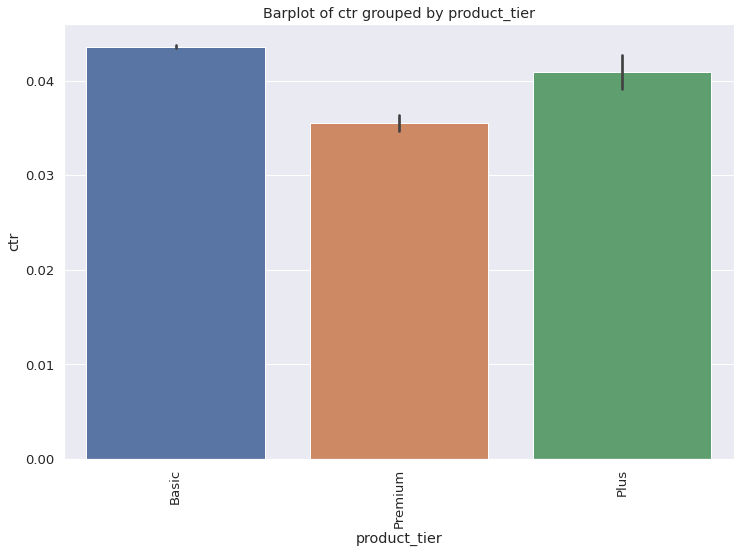

In [ ]:
plot_barplot(data7, x_col='product_tier', y_col='ctr')

##### **product_tier vs stock_days**

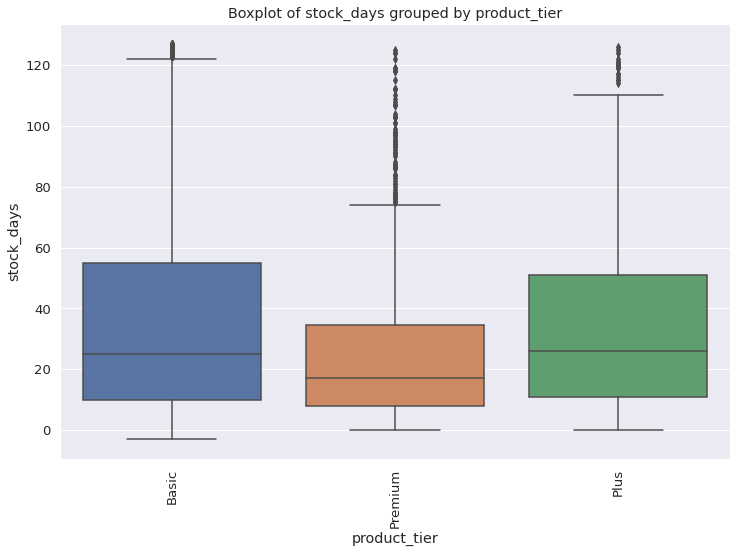

In [ ]:
plot_boxplot(data7, x_col='product_tier', y_col='stock_days')

# 7. Exporting the cleaned data

The data after cleaning and treatment of the outliers is exported as a new dataframe to be used in the subsequent classification and regression tasks

In [ ]:
data7.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,created_month,created_dayofweek,created_day,deleted_year,deleted_month,deleted_dayofweek,deleted_day
0,350625839,Basic,Mitsubishi,16750,5,2013,2018-07-24,2018-08-24,3091.0,123.0,30,0.039793,7,1,24,2018,8,4,24
1,354412280,Basic,Mercedes-Benz,35950,4,2015,2018-08-16,2018-07-10,3283.0,223.0,52,0.067926,8,3,16,2018,7,1,10
3,350266763,Basic,Ford,1750,6,2003,2018-07-20,2018-10-29,1856.0,26.0,101,0.014009,7,4,20,2018,10,0,29
4,355688985,Basic,Mercedes-Benz,26500,3,2014,2018-08-28,2018-08-09,490.0,20.0,12,0.040816,8,1,28,2018,8,3,9
5,361204569,Basic,Volkswagen,24890,6,2017,2018-10-20,2018-10-22,125.0,6.0,2,0.048000,10,5,20,2018,10,0,22


Before we export the cleaned data, the "article_id", "created_date" and "deleted_date" columns are dropped

In [ ]:
data8 = data7.drop(columns=["article_id", "created_date", "deleted_date"])

In [ ]:
!pwd

/gdrive/My Drive/AutoScout24_Data_Challenge


In [ ]:
data8.to_csv("/gdrive/My Drive/AutoScout24_Data_Challenge/data/cleaned_data.csv")